In [ ]:
! pip install networkx
! pip install plotly
! pip install colorlover

In [ ]:
import networkx as nx
import pandas as pd
import collections
import matplotlib.pyplot as plt
from collections import Counter

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import IPython

import random

import colorlover as cl
from IPython.display import HTML

import plotly
plotly.__version__

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("stopwords")
nltk.download("wordnet")

from nltk import tokenize
from nltk.corpus import stopwords
from nltk.data import find

#Operation
import operator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')
print("Num of rows:", df.shape[0])
df.head()

Num of rows: 3437690


date        user          tweet
0  2009-06-01 21:43:59  burtonator  No Post Title
1  2009-06-01 21:47:23  burtonator  No Post Title
2  2009-06-02 01:15:44  burtonator  No Post Title
3  2009-06-02 05:17:52  burtonator  No Post Title
4  2009-06-02 23:58:25  burtonator  No Post Title

#Q1. Choose a hashtag
**Chosen hashtag: #facebook**

#Q2. Build a Mention Graph

In [ ]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [ ]:
hashTagsCounter.most_common(100)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

In [ ]:
facebookTag = df[df["tweet"].str.lower().str.contains("#facebook", na=False)].copy()

In [ ]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [ ]:
addMentionedColumn(facebookTag) # add a colunm including all @ in this tweet

In [ ]:
facebookTag.head(10)

date  ...                  mentioned
5639   2009-06-11 17:08:04  ...                         []
21157  2009-06-11 17:26:38  ...  [velenux, googlepolicyit]
25643  2009-06-11 17:34:56  ...                  [garyvee]
28973  2009-06-11 17:41:25  ...                [stefanw, ]
40133  2009-06-11 17:59:19  ...                         []
40735  2009-06-11 17:59:57  ...                         []
40895  2009-06-11 18:00:14  ...             [thelancelife]
66111  2009-06-11 18:40:08  ...                         []
82502  2009-06-11 19:07:41  ...                         []
86858  2009-06-11 19:15:08  ...                         []

[10 rows x 4 columns]

In [ ]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

##(a) 
There are **746 nodes** and **542 edges** in the mention graph. 

In [ ]:
facebookGraph = mentionGraph(facebookTag)

In [ ]:
print("# nodes:", len(facebookGraph.nodes()))
print("# edges:", len(facebookGraph.edges()))

# nodes: 746
# edges: 542


In [ ]:
facebookGraph['thelancelife']

AtlasView({'thelancelife': {'numberMentions': 3}, 'federicacau': {'numberMentions': 2}})

##(b)

Degree sequence [29, 16, 10, 8, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

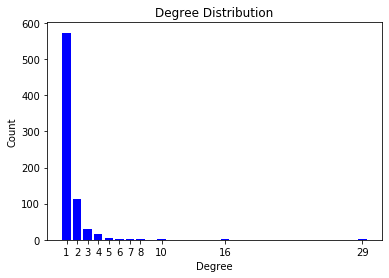

In [ ]:
# Ref: https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
# https://stackoverflow.com/questions/29139350/difference-between-ziplist-and-ziplist/29139418
degree_sequence = sorted([d for n, d in facebookGraph.degree()], reverse=True)  # degree sequence
print ("Degree sequence", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print("Degree: ", deg, "Count: ", cnt) 

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.show()

For all 746 nodes in the graph, most of them have a very small number of degrees. More than 550 nodes have degree 1, and approximately 110 nodes have degree 2. Less than 100 nodes have degree 3 or more. The highest degree is 29 and only one node has such a high degree. The observations could imply that most users did not have many mentions (they seemed not like to interact that much with each other under the #facebook). 

##(c) 

In [ ]:
# Ref: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.MultiDiGraph.get_edge_data.html
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

def getEdgeWeights(g):
  edge_weights = {}
  for (u,v) in g.edges: 
    edge_weights[(u,v)] = g.get_edge_data(u,v,default=0)['numberMentions']
  #print(edge_weights)
  return edge_weights

weights = getEdgeWeights(facebookGraph)
top5edges = sorted(weights.items(), key=lambda x: x[1], reverse=True)[:5]
top5edges

[(('rondostar', 'levelten_colin'), 6),
 (('bullconsulting', 'pachanyc'), 5),
 (('photoshoptips', 'thomasbregulla'), 4),
 (('babysherlene', 'laibcoms'), 4),
 (('mayhemstudios', 'spndrm'), 4)]

##(d)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
addRandomPositions(facebookGraph)

In [ ]:
nx.get_node_attributes(facebookGraph, 'pos')['thelancelife']

(-10.639251668019218, 2.5555109964921554)

In [ ]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
facebookGraph.nodes['jacreative']['pos']

(9.153955164820553, -6.288904010910425)

In [ ]:
configure_plotly_browser_state()
plotNetwork(facebookGraph)

In [ ]:
def plotNetworkSize(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSize(facebookGraph)

In [ ]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

###Visualization: 

In [ ]:
def plotEdgeWeightColor(graph):

    maxWgt = max(getEdgeWeights(graph).values())
    minWgt = min(getEdgeWeights(graph).values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-minWgt)/(maxWgt-minWgt))

        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='text',
                text="Edge: %s\nWeights: %.3f" % ((node1,node2), edgeWidth),
                mode='lines', 
                line=scatter.Line(width=edgeWidth,color=purd300[edgeColor])) 
        scatters.append(s)

    for node in graph.nodes():
        #nodeCentr = closenessCentr[node]
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                
                hoverinfo='none',
                mode='markers', 
                marker=dict(color='#888', 
                    size=3,line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotEdgeWeightColor(facebookGraph)

#Q3. Content Analysis

##(a)

In [ ]:
# Ref: get from sentiment analysis assignment 

def getTopK(df, k, value_column='tweet'):
    stop = set(stopwords.words('english'))
    #stop.add('facebook')
    #lemmatizer = nltk.WordNetLemmatizer()
    #stemmer = nltk.stem.porter.PorterStemmer()

    counter = Counter()
    for twt in df[value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', twt) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [ ]:
# top 100 common words on twitter under #facebook
getTopK(facebookTag,100)

[('http', 1177),
 ('com', 773),
 ('www', 457),
 ('username', 302),
 ('bit', 273),
 ('url', 197),
 ('vanity', 162),
 ('twitter', 140),
 ('usernames', 103),
 ('get', 93),
 ('2009', 93),
 ('got', 90),
 ('name', 83),
 ('tinyurl', 63),
 ('new', 62),
 ('page', 53),
 ('available', 43),
 ('urls', 42),
 ('mashable', 41),
 ('socialmedia', 39),
 ('first', 39),
 ('fan', 38),
 ('minutes', 38),
 ('vanityurl', 34),
 ('via', 34),
 ('grab', 33),
 ('google', 32),
 ('000', 32),
 ('social', 31),
 ('like', 31),
 ('tonight', 30),
 ('time', 29),
 ('facebookvanity', 29),
 ('mine', 28),
 ('friends', 28),
 ('ich', 28),
 ('good', 27),
 ('bio', 26),
 ('last', 25),
 ('also', 25),
 ('media', 23),
 ('please', 23),
 ('auch', 23),
 ('profile', 22),
 ('facebooklandgrab', 22),
 ('work', 22),
 ('still', 22),
 ('one', 21),
 ('myspace', 21),
 ('bei', 21),
 ('added', 20),
 ('wefollow', 20),
 ('directory', 20),
 ('fans', 20),
 ('live', 20),
 ('cspenn', 20),
 ('friend', 19),
 ('names', 19),
 ('need', 19),
 ('know', 19),
 ('li

Based on my interpretation, there seems to be four main themes. 

From the top words "http", "com", "www" and "url", it can be implied that many people were posting some urls that might link to their facebook pages. The pages probably contained some ads and the user used facebook to do marketing or, they wanted to add friends since from 2009, facebook started to get popular based on wiki https://en.wikipedia.org/wiki/History_of_Facebook. 

From the top words "username", "name" and "profile", it seems that people were discussing the username and profile settings of facebook. There might be some new features of personal profile on facebook that might not appear on other social media before. 

From the top words "vanity", "social media" etc., there seemed to be some dicussion and concerns on using too much social media like facebook and twitter. 

Also, "myspace" is in the top 100 list. It seemed like some people at that time (2009) were using myspace and there might be some comparisons between myspace and facebook. Some users may be relauctant to switch to facebook from myspace. 

##(b)

In [ ]:
def getTopK_perUser(df, k, label_value, label_column='user', operation=operator.eq, value_column='tweet'):
    stop = set(stopwords.words('english'))
    
    counter = Counter()
    for twt in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', twt) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [ ]:
getTopK_perUser(facebookTag,3,'bullconsulting')

[('pachanyc', 5), ('facebook', 5), ('fan', 5)]

In [ ]:
def plotEdgeWeightColor_top3(graph):

    maxWgt = max(getEdgeWeights(graph).values())
    minWgt = min(getEdgeWeights(graph).values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-minWgt)/(maxWgt-minWgt))

        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='text',
                text="Edge: %s\nWeights: %.3f" % ((node1,node2), edgeWidth),
                mode='lines', 
                line=scatter.Line(width=edgeWidth,color=purd300[edgeColor])) 
        scatters.append(s)

    for node in graph.nodes():
        #nodeCentr = closenessCentr[node]
        xPos, yPos = graph.nodes[node]['pos']
        top3words = getTopK_perUser(facebookTag, 3,node)

        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='text',
                text="Node: %s\ntop 3 common words: %s" % (node, top3words),
                mode='markers', 
                marker=dict(color='#888', 
                size=3,line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotEdgeWeightColor_top3(facebookGraph)

#Q4. Centrality Analysis

##(a)
Select **degree centrality** and **betweenness centrality**

In [ ]:
# 1. Degree
deg = nx.degree_centrality(facebookGraph)
deg

{'': 0.009395973154362415,
 '123socialmedia': 0.0013422818791946308,
 '12c4': 0.0013422818791946308,
 '1kc': 0.0013422818791946308,
 '___dagger___': 0.0013422818791946308,
 '_aj': 0.0013422818791946308,
 'aaronbransomnme': 0.0013422818791946308,
 'abcd91': 0.0013422818791946308,
 'aboutbooks': 0.0013422818791946308,
 'academicdave': 0.0013422818791946308,
 'acurrie': 0.0013422818791946308,
 'addthis': 0.0013422818791946308,
 'adel': 0.0013422818791946308,
 'adityarao310': 0.0026845637583892616,
 'al_ferretti': 0.0013422818791946308,
 'alan0624': 0.0013422818791946308,
 'alcarlton': 0.0013422818791946308,
 'alehtse': 0.0013422818791946308,
 'alessiosbrana': 0.0013422818791946308,
 'alextanpr': 0.0013422818791946308,
 'alexvolk': 0.0013422818791946308,
 'alleyinsider': 0.004026845637583892,
 'allgaeuer': 0.0013422818791946308,
 'alvinkoay': 0.0013422818791946308,
 'amauf': 0.0013422818791946308,
 'amicalmant': 0.0013422818791946308,
 'amonck': 0.0013422818791946308,
 'amrnt': 0.002684563

In [ ]:
# 2. Betweenness
btw = nx.betweenness_centrality(facebookGraph)
btw

{'': 0.003312405282528686,
 '123socialmedia': 0.0,
 '12c4': 0.0,
 '1kc': 0.0,
 '___dagger___': 0.0,
 '_aj': 0.0,
 'aaronbransomnme': 0.0,
 'abcd91': 0.0,
 'aboutbooks': 0.0,
 'academicdave': 0.0,
 'acurrie': 0.0,
 'addthis': 0.0,
 'adel': 0.0,
 'adityarao310': 0.0,
 'al_ferretti': 0.0,
 'alan0624': 0.0,
 'alcarlton': 0.0,
 'alehtse': 0.0,
 'alessiosbrana': 0.0,
 'alextanpr': 0.0,
 'alexvolk': 0.0,
 'alleyinsider': 0.001145690505400399,
 'allgaeuer': 0.0,
 'alvinkoay': 0.0,
 'amauf': 0.0,
 'amicalmant': 0.0,
 'amonck': 0.0,
 'amrnt': 0.0,
 'amyvernon': 0.0,
 'andienns': 0.0,
 'andjohan': 0.0,
 'andreasklinger': 0.0,
 'anewa': 0.0,
 'angelaymartin': 0.0,
 'angeltcgirl': 0.0,
 'anildash': 0.0,
 'annagrassi': 3.608284621490943e-06,
 'annalisa2': 0.0,
 'annieonline': 0.0,
 'anteek': 0.0,
 'argus27': 0.0,
 'arturot': 0.00032113733131269395,
 'asfaq': 0.0,
 'astralinsomnia': 0.0,
 'atilo': 0.0,
 'atlgrrrl4life': 0.0,
 'ausrob': 0.0,
 'azrael74': 0.0,
 'babysherlene': 0.0007938226167280074,
 '

##(b)

In [ ]:
def plotNetworkCentralitySizeColor(graph,measure):
    
    centrality = measure
    maxCentr = max(centrality.values())
    minCentr = min(centrality.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = centrality[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*4,          
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkCentralitySizeColor(facebookGraph, deg)

In [ ]:
configure_plotly_browser_state()
plotNetworkCentralitySizeColor(facebookGraph, btw)

In [ ]:
top5deg = sorted(deg.items(), key=lambda x: x[1], reverse=True)[:5]
top5btw = sorted(btw.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
top5deg

[('mashable', 0.038926174496644296),
 ('cspenn', 0.021476510067114093),
 ('enavarroa', 0.013422818791946308),
 ('mmidas', 0.010738255033557046),
 ('scottmonty', 0.010738255033557046)]

In [ ]:
top5btw

[('mashable', 0.012232084866854296),
 ('majiwater', 0.004443602511366097),
 ('mmidas', 0.004271607611075028),
 ('stefanw', 0.0036780447908397675),
 ('nextmoon', 0.0033773544057155228)]

##(c)
Top 5 key players based on **degree**: "mashable", "cspenn", "enavarroa", "mmidas" and "scottmonty". 


Top 5 key players based on **betweenness**: "mashable", "majiwater", "mmidas", "stefanw" and "nextmoon". 

In both graphs, the colour is proportional to the centrality i.e. the darker the node, the higher the centrality, whereas the size of the node is proportional to its degree.

1. The results are different. The user "mashable" gets the highest centrality in both measures, but for most of nodes including other top nodes (like top 2 to top 5), the results are different. The reason could be that the betweenness measures the centrality based on the shortest path (how many nodes have to go through this node in order to get to antoher one, i.e. brokerage) while the degree only considers the number of inflow/outflow edges (connection between its direct neighbours).  

2. Betweenness is more meaningful. It captures the influence and importance of the node in the network, not just the number of direct connections with other nodes. If one node is the brokerage between many nodes and has a high betweenness, then this node is more influential in this network. But the degree centrality does not capture such information. 

#Q5. Connectivity Patterns

##(a)

###1. Number of maximal cliques in the graph

In [ ]:
cliq1 = nx.graph_number_of_cliques(facebookGraph)
cliq1

502

###2. The graph's clique number (size of the largest clique in the graph)

In [ ]:
cliq2 = nx.graph_clique_number(facebookGraph)
cliq2

3

###3. Number of maximal cliques for each node

In [ ]:
cliq3 = nx.number_of_cliques(facebookGraph)
cliq3

{'': 7,
 '123socialmedia': 1,
 '12c4': 1,
 '1kc': 1,
 '___dagger___': 1,
 '_aj': 1,
 'aaronbransomnme': 1,
 'abcd91': 1,
 'aboutbooks': 1,
 'academicdave': 1,
 'acurrie': 1,
 'addthis': 1,
 'adel': 1,
 'adityarao310': 1,
 'al_ferretti': 1,
 'alan0624': 1,
 'alcarlton': 1,
 'alehtse': 1,
 'alessiosbrana': 1,
 'alextanpr': 1,
 'alexvolk': 1,
 'alleyinsider': 3,
 'allgaeuer': 1,
 'alvinkoay': 1,
 'amauf': 1,
 'amicalmant': 1,
 'amonck': 1,
 'amrnt': 1,
 'amyvernon': 1,
 'andienns': 1,
 'andjohan': 1,
 'andreasklinger': 1,
 'anewa': 1,
 'angelaymartin': 1,
 'angeltcgirl': 1,
 'anildash': 1,
 'annagrassi': 2,
 'annalisa2': 1,
 'annieonline': 1,
 'anteek': 1,
 'argus27': 1,
 'arturot': 2,
 'asfaq': 1,
 'astralinsomnia': 1,
 'atilo': 1,
 'atlgrrrl4life': 1,
 'ausrob': 1,
 'azrael74': 1,
 'babysherlene': 4,
 'barbarahauck': 2,
 'barbbinder': 1,
 'barnesjewish': 1,
 'barrypeters': 2,
 'basticore': 1,
 'bbimoon': 1,
 'bcuban)': 1,
 'beekristine': 1,
 'bencapozzi': 1,
 'benparr': 2,
 'bergmensch'

###4. Size of the largest maximal clique containing each given node

In [ ]:
cliq4 = nx.node_clique_number(facebookGraph)
cliq4

{'': 2,
 '123socialmedia': 2,
 '12c4': 2,
 '1kc': 2,
 '___dagger___': 2,
 '_aj': 2,
 'aaronbransomnme': 2,
 'abcd91': 2,
 'aboutbooks': 2,
 'academicdave': 2,
 'acurrie': 2,
 'addthis': 2,
 'adel': 2,
 'adityarao310': 3,
 'al_ferretti': 2,
 'alan0624': 2,
 'alcarlton': 2,
 'alehtse': 2,
 'alessiosbrana': 2,
 'alextanpr': 2,
 'alexvolk': 2,
 'alleyinsider': 2,
 'allgaeuer': 2,
 'alvinkoay': 2,
 'amauf': 2,
 'amicalmant': 2,
 'amonck': 2,
 'amrnt': 1,
 'amyvernon': 2,
 'andienns': 2,
 'andjohan': 2,
 'andreasklinger': 2,
 'anewa': 2,
 'angelaymartin': 2,
 'angeltcgirl': 2,
 'anildash': 2,
 'annagrassi': 2,
 'annalisa2': 2,
 'annieonline': 2,
 'anteek': 2,
 'argus27': 3,
 'arturot': 2,
 'asfaq': 2,
 'astralinsomnia': 2,
 'atilo': 2,
 'atlgrrrl4life': 2,
 'ausrob': 2,
 'azrael74': 2,
 'babysherlene': 2,
 'barbarahauck': 2,
 'barbbinder': 2,
 'barnesjewish': 2,
 'barrypeters': 2,
 'basticore': 3,
 'bbimoon': 2,
 'bcuban)': 2,
 'beekristine': 2,
 'bencapozzi': 2,
 'benparr': 3,
 'bergmensch'

##(b)

In [ ]:
# more analysis on number of maximal cliques for each node
max_num_cliq = max(cliq3.values())
max_num_cliq

28

In [ ]:
min_num_cliq = min(cliq3.values())
min_num_cliq

1

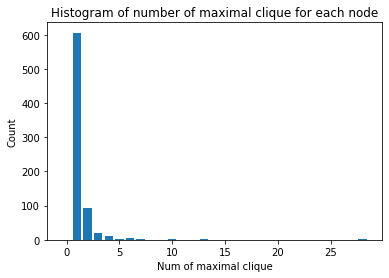

In [ ]:
cnt_num_max_cliq = []
x_val1 = []

for i in range(max_num_cliq+1): 
  cnt_num_max_cliq.append(sum(n == i for n in cliq3.values()))
  x_val1.append(i)

plt.bar(x_val1,cnt_num_max_cliq)
plt.ylabel("Count")
plt.xlabel("Num of maximal clique")
plt.title("Histogram of number of maximal clique for each node")
ax.set_xticks([x for x in x_val1])
ax.set_xticklabels(x_val1)
plt.show()


In [ ]:
cnt_num_max_cliq

[0,
 606,
 94,
 21,
 11,
 3,
 5,
 3,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [ ]:
# more analysis on size of the largest maximal clique containing each given node
largest = sum(c == 3 for c in cliq4.values())
largest

36

In [ ]:
second = sum(c == 2 for c in cliq4.values())
second

705

In [ ]:
third = sum(c == 1 for c in cliq4.values())
third

5

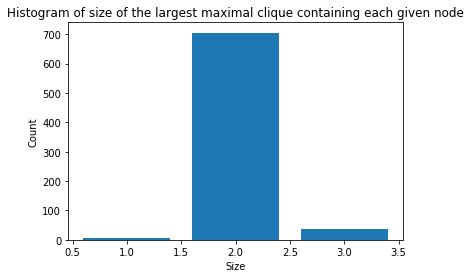

In [ ]:
x_val2 = [3,2,1]
plt.bar(x_val2,[largest,second,third])
plt.ylabel("Count")
plt.xlabel("Size")
plt.title("Histogram of size of the largest maximal clique containing each given node")
ax.set_xticks([x for x in x_val2])
ax.set_xticklabels(x_val2)
plt.show()

There are 502 maximal cliques in the graph, and the size of the largest clique in the graph is 3. 

From the histogram of number of maximal clique for each node we can see that 606 nodes out of 746 are involved only in 1 maximal clique, 94 nodes are in 2, and 21 have 3 maximal cliques. However, only 3 nodes have 10 or more maximal cliques. 

There are 36 nodes involved into the largest clique of the network (with size 3). Most of the nodes (705 out of 746) are contained in the size 2 maximal clique, and only 5 are in the size 1 maximal clique which means they don't have any edges connecting with other nodes. 

From the above observations, we can imply that not many users have actually interacted with each other under the hashtag #facebook. Mostly they just posted a twitter with #facebook but didn't mentioned anyone. And for the 3 nodes that involved in 10 or more maximal cliques, they might be the most influential users in this social network. But since we are dealing with an undirected graph, there is also a possiblity that this 3 users might just mention other users for many times (i.e. they aren't necessarily the most influential users in this network, they just liked to mention others). 